##Universidad Autónoma de Chihuahua
##Facultad de Ingeniería
###Maestría en Computación
###Machine Learning
###Implementación de Decision Tree y Random Forest
####Dra Olanda Prieto Ordaz
####329675 Maritrini Velázquez Ruiz

###EDA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
stroke_df = pd.read_csv('/content/healthcare-dataset-stroke-data.xls')

In [ ]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
stroke_df = stroke_df.drop(['id'], axis=1)

In [ ]:
stroke_df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<ipython-input-8-1e39fd784357>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=stroke_df, palette='hls')


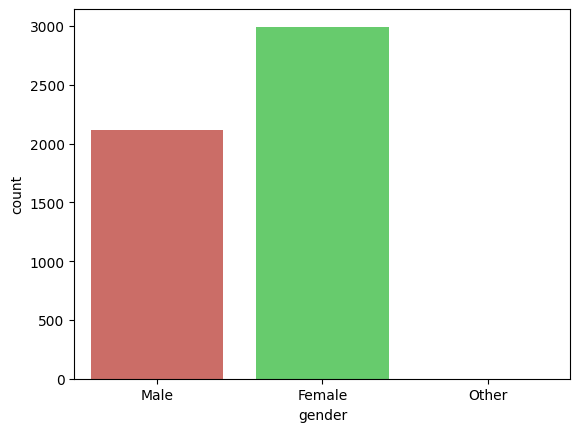

In [ ]:
sns.countplot(x='gender', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.stroke.value_counts()

,count
stroke,
0,4861
1,249


<ipython-input-10-bc0ac6cf8f83>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=stroke_df, palette='hls')


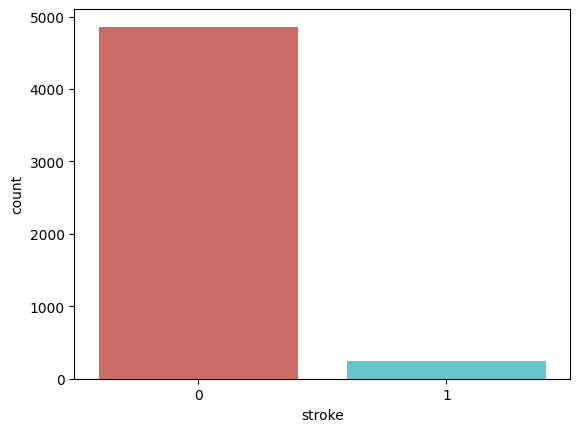

In [ ]:
sns.countplot(x='stroke', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<ipython-input-12-decf3a307382>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_status', data=stroke_df, palette='hls')


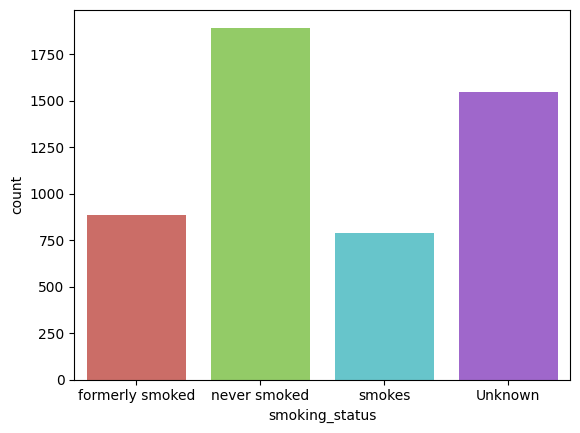

In [ ]:
sns.countplot(x='smoking_status', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.ever_married.value_counts()

,count
ever_married,
Yes,3353
No,1757


<ipython-input-14-c9bbda431033>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ever_married', data=stroke_df, palette='hls')


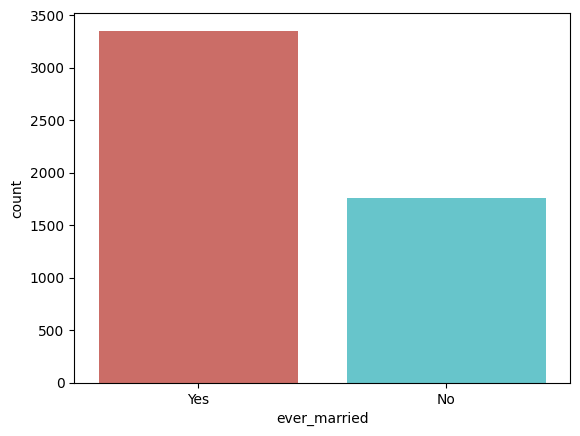

In [ ]:
sns.countplot(x='ever_married', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.work_type.value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<ipython-input-16-942faef22efb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='work_type', data=stroke_df, palette='hls')


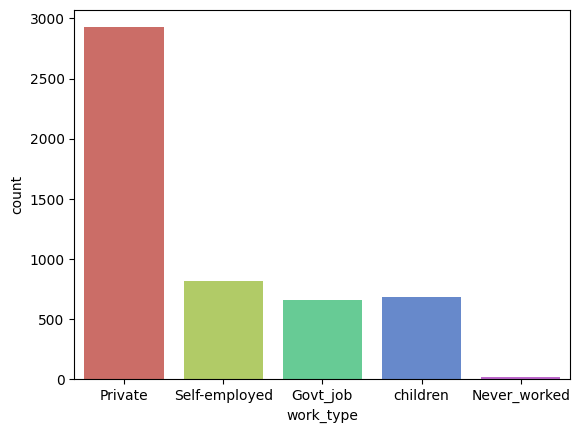

In [ ]:
sns.countplot(x='work_type', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.hypertension.value_counts()

,count
hypertension,
0,4612
1,498


<ipython-input-18-710e6d05bed9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=stroke_df, palette='hls')


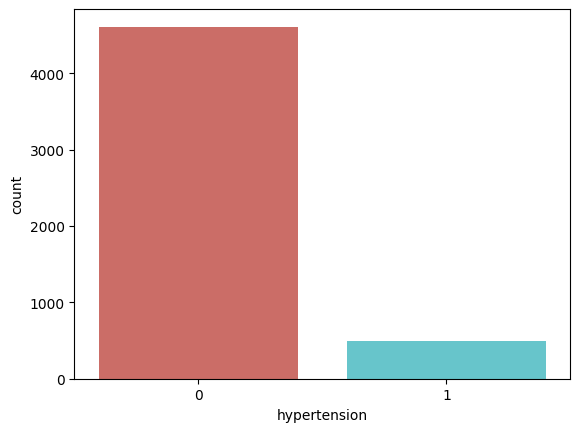

In [ ]:
sns.countplot(x='hypertension', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.heart_disease.value_counts()

,count
heart_disease,
0,4834
1,276


<ipython-input-20-f7c747787eaf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=stroke_df, palette='hls')


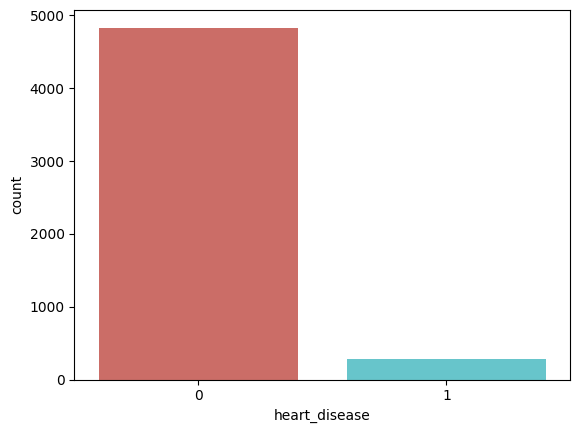

In [ ]:
sns.countplot(x='heart_disease', data=stroke_df, palette='hls')
plt.show()

In [ ]:
stroke_df.age.value_counts()

,count
age,
78.00,102
57.00,95
52.00,90
54.00,87
51.00,86
...,...
1.40,3
0.48,3
0.16,3


In [ ]:
#Rellenar los datos vacios de bmi con el promedio
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') #default 'mean'

In [ ]:
columns = ['bmi']
stroke_df[columns] = imputer.fit_transform(stroke_df[columns])

In [ ]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
#cambiar atributos categoricos a numericos
from sklearn.preprocessing import LabelEncoder
labelEn = LabelEncoder()

In [ ]:
stroke_df['gender']=labelEn.fit_transform(stroke_df['gender'])
stroke_df['work_type']=labelEn.fit_transform(stroke_df['work_type'])
stroke_df['Residence_type']=labelEn.fit_transform(stroke_df['Residence_type'])
stroke_df['smoking_status']=labelEn.fit_transform(stroke_df['smoking_status'])
stroke_df['ever_married']=labelEn.fit_transform(stroke_df['ever_married'])

In [ ]:
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
#eliminar datos redundantes
stroke_df[stroke_df.gender.values > 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,2,26.0,0,0,0,2,0,143.33,22.4,1,0


In [ ]:
index=stroke_df[stroke_df.gender.values > 1].index
index

Index([3116], dtype='int64')

In [ ]:
stroke_df=stroke_df.drop([stroke_df.index[3116]], axis=0)

In [ ]:
##correlation matrix
corr_matrix = stroke_df.corr()
corr_matrix["stroke"].sort_values(ascending=False)

,stroke
stroke,1.000000
age,0.245239
heart_disease,0.134905
avg_glucose_level,0.131991
hypertension,0.127891
ever_married,0.108299
bmi,0.038912
smoking_status,0.028108
Residence_type,0.015415
gender,0.009081


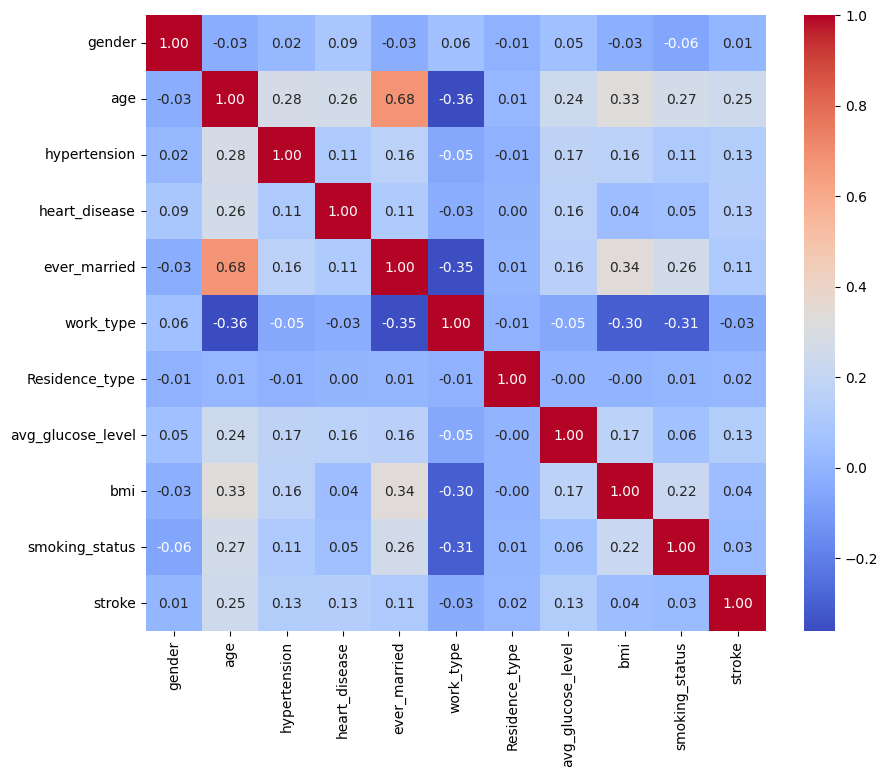

In [ ]:
#matriz de correlaciones con el target
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True ,fmt=".2f", cmap='coolwarm', cbar=True)

plt.show()

In [ ]:
#Division de los datos train, test
X = stroke_df.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [ ]:
##obtener el target (stroke)
y = stroke_df['stroke']
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


##Entreanmiento con Datos sin estandarizar

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#balance datos entrenamiento
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

###Decision tree

In [ ]:
#Decision tree sin SMOTE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_test, y_pred_dt)

0.908675799086758

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1458
           1       0.16      0.20      0.18        75

    accuracy                           0.91      1533
   macro avg       0.56      0.57      0.56      1533
weighted avg       0.92      0.91      0.91      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_dt))

[[1378   80]
 [  60   15]]


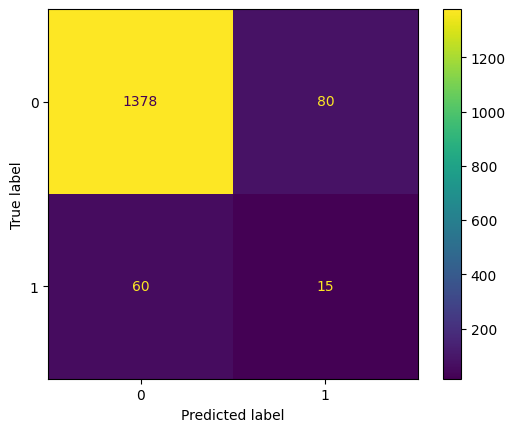

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt.classes_)
disp.plot()
plt.show()

In [ ]:
#busqueda de mejores hiperparametros grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
#grid search
param_grid = {
    'max_depth': [2, 3, 4,5, 6, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [ ]:
dt_best = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [ ]:
dt_best.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
dt_best.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_dt_best = dt_best.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt_best)

0.9510763209393346

In [ ]:
print(classification_report(y_test, y_pred_dt_best))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_dt_best))

[[1458    0]
 [  75    0]]


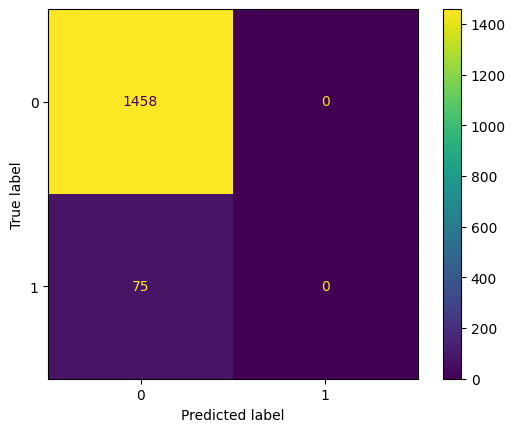

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_best), display_labels=dt_best.classes_)
disp.plot()
plt.show()

In [ ]:
#entrenamiento con smote
dt_smote = DecisionTreeClassifier()
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_smote = dt_smote.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_dt_smote)

0.8610567514677103

In [ ]:
print(classification_report(y_test, y_pred_dt_smote))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1458
           1       0.08      0.17      0.11        75

    accuracy                           0.86      1533
   macro avg       0.52      0.53      0.52      1533
weighted avg       0.91      0.86      0.88      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_dt_smote))

[[1307  151]
 [  62   13]]


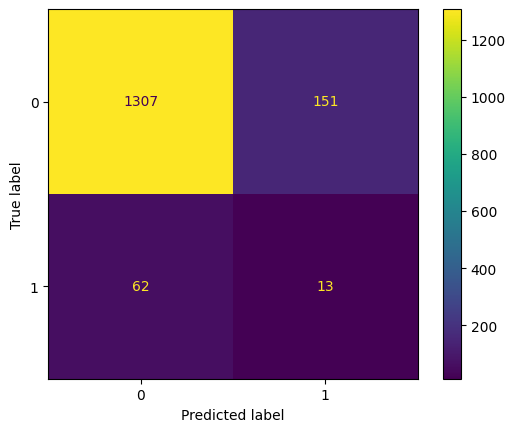

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_smote), display_labels=dt_smote.classes_)
disp.plot()
plt.show()

In [ ]:
#best hyperparam
dt_best_smote = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [ ]:
dt_best_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
dt_best_smote.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
dt_best_smote_pred = dt_best_smote.predict(X_test)

In [ ]:
accuracy_score(y_test, dt_best_smote_pred)

0.8082191780821918

In [ ]:
print(classification_report(y_test, dt_best_smote_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1458
           1       0.11      0.43      0.18        75

    accuracy                           0.81      1533
   macro avg       0.54      0.63      0.54      1533
weighted avg       0.92      0.81      0.86      1533



In [ ]:
print(confusion_matrix(y_test, dt_best_smote_pred))

[[1207  251]
 [  43   32]]


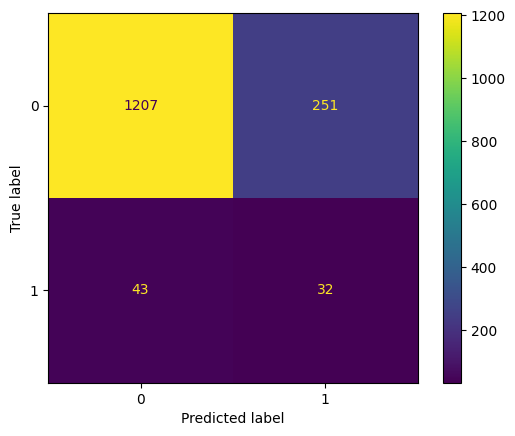

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_best_smote_pred), display_labels=dt_best_smote.classes_)
disp.plot()
plt.show()

###Random Forrest

In [ ]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.9510763209393346

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[1458    0]
 [  75    0]]


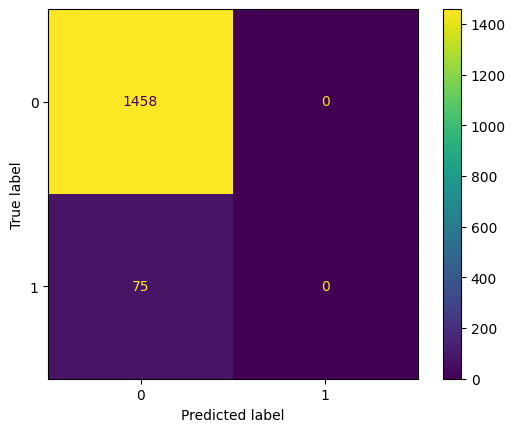

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf), display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
##best hiperparameter
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4,5, 6, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf_best = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

In [ ]:
rf_best.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
rf_best.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_rf_best = rf_best.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf_best)

0.9510763209393346

In [ ]:
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_rf_best))

[[1458    0]
 [  75    0]]


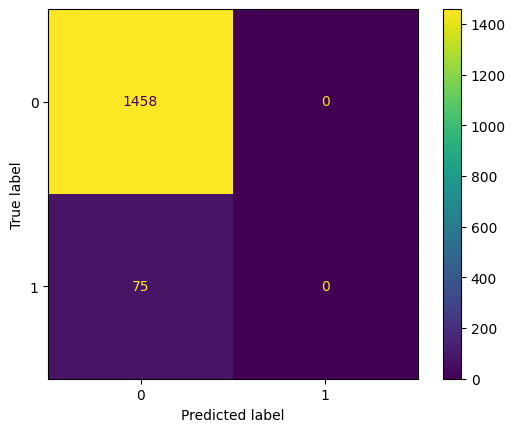

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_best), display_labels=rf_best.classes_)
disp.plot()
plt.show()

In [ ]:
#train con smote
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf_smote = rf_smote.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf_smote)

0.8878016960208741

In [ ]:
print(classification_report(y_test, y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1458
           1       0.10      0.16      0.12        75

    accuracy                           0.89      1533
   macro avg       0.53      0.54      0.53      1533
weighted avg       0.91      0.89      0.90      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_rf_smote))

[[1349  109]
 [  63   12]]


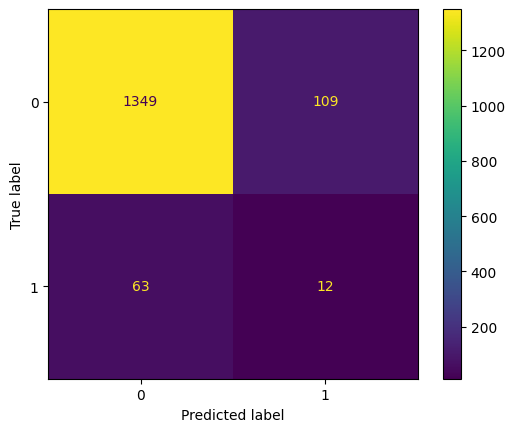

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_smote), display_labels=rf_smote.classes_)
disp.plot()
plt.show()

In [ ]:
#mejores hiperparametros
rf_best_smote = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

In [ ]:
rf_best_smote.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
rf_best_smote.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_rf_best_smote = rf_best_smote.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_rf_best_smote)

0.8349641226353555

In [ ]:
print(classification_report(y_test, y_pred_rf_best_smote))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1458
           1       0.10      0.31      0.15        75

    accuracy                           0.83      1533
   macro avg       0.53      0.58      0.53      1533
weighted avg       0.92      0.83      0.87      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_rf_best_smote))

[[1257  201]
 [  52   23]]


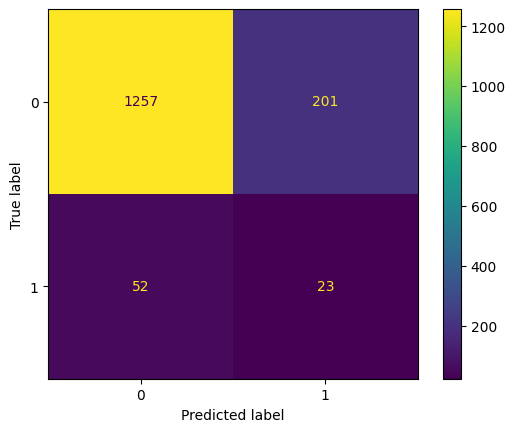

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_best_smote), display_labels=rf_best_smote.classes_)
disp.plot()
plt.show()

##Entrenamiento con datos estandarizados

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#escalamiento de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled_smote = scaler.fit_transform(X_train_smote)

###Decision Tree

In [ ]:
#Decision Tree sin SMOTE
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_dt_scaled)

0.9073711676451403

In [ ]:
print(classification_report(y_test, y_pred_dt_scaled))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1458
           1       0.17      0.24      0.20        75

    accuracy                           0.91      1533
   macro avg       0.57      0.59      0.58      1533
weighted avg       0.92      0.91      0.91      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_dt_scaled))

[[1373   85]
 [  57   18]]


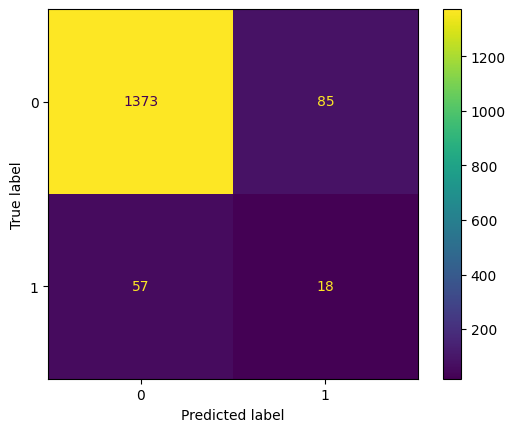

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_scaled), display_labels=dt_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
param_grid

{'max_depth': [2, 3, 4, 5, 6, 10],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 5]}

In [ ]:
#grid search
dt_best_scaled = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [ ]:
dt_best_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
dt_best_scaled.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_dt_best_scaled = dt_best_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_dt_best_scaled)

0.9510763209393346

In [ ]:
print(classification_report(y_test, y_pred_dt_best_scaled))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_dt_best_scaled))

[[1458    0]
 [  75    0]]


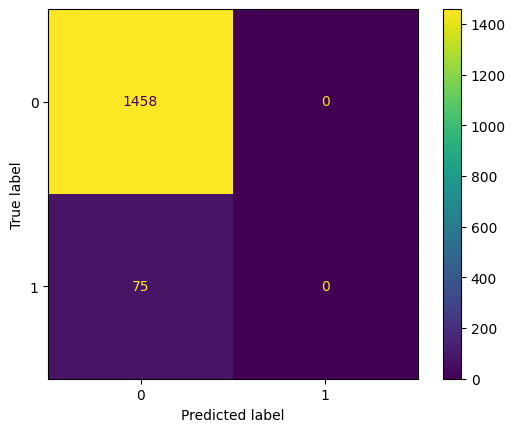

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_best_scaled), display_labels=dt_best_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
#entrenamiento con SMOTE
dt_smote_scaled = DecisionTreeClassifier()
dt_smote_scaled.fit(X_train_scaled_smote, y_train_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_dt_smote_scaled = dt_smote_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_dt_smote_scaled)

0.7801696020874103

In [ ]:
print(classification_report(y_test, y_pred_dt_smote_scaled))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1458
           1       0.08      0.35      0.13        75

    accuracy                           0.78      1533
   macro avg       0.52      0.57      0.50      1533
weighted avg       0.92      0.78      0.84      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_dt_smote_scaled))

[[1170  288]
 [  49   26]]


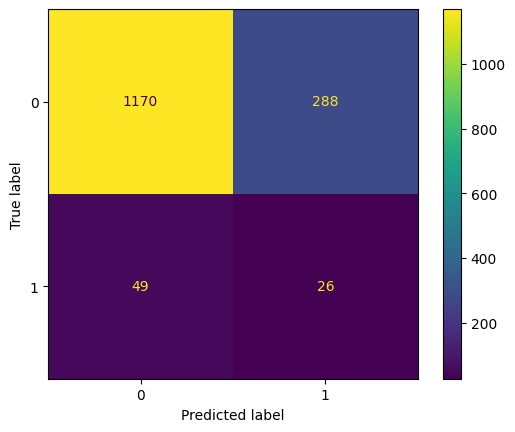

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_smote_scaled), display_labels=dt_smote_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
#grid search smote
dt_best_smote_scaled = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [ ]:
dt_best_smote_scaled.fit(X_train_scaled_smote, y_train_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
dt_best_smote_scaled.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
y_pred_dt_best_smote_scaled = dt_best_smote_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_dt_best_smote_scaled)

0.7045009784735812

In [ ]:
print(classification_report(y_test, y_pred_dt_best_smote_scaled))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1458
           1       0.06      0.36      0.11        75

    accuracy                           0.70      1533
   macro avg       0.51      0.54      0.46      1533
weighted avg       0.91      0.70      0.79      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_dt_best_smote_scaled))

[[1053  405]
 [  48   27]]


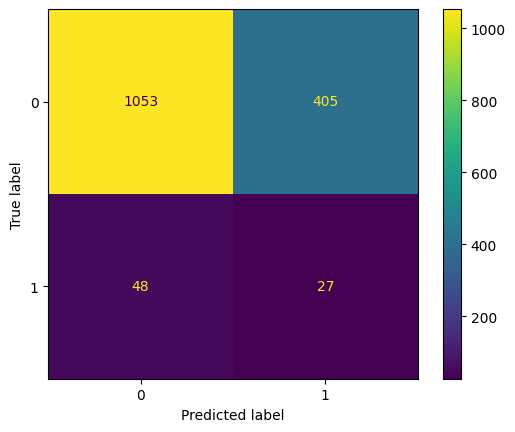

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_best_smote_scaled), display_labels=dt_best_smote_scaled.classes_)
disp.plot()
plt.show()

##Random Forest

In [ ]:
#Random Forest sin SMOTE
rf_scaled = RandomForestClassifier()
rf_scaled.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_scaled = rf_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_rf_scaled)

0.9517286366601435

In [ ]:
print(classification_report(y_test, y_pred_rf_scaled))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1458
           1       0.67      0.03      0.05        75

    accuracy                           0.95      1533
   macro avg       0.81      0.51      0.51      1533
weighted avg       0.94      0.95      0.93      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_rf_scaled))

[[1457    1]
 [  73    2]]


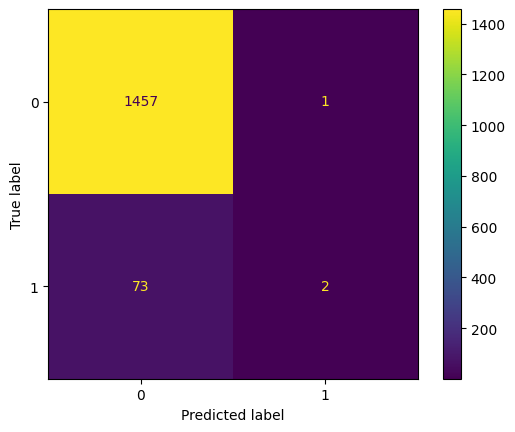

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_scaled), display_labels=rf_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
#grid search
rf_best_scaled = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

In [ ]:
rf_best_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
rf_best_scaled.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_rf_best_scaled = rf_best_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_rf_best_scaled)

0.9510763209393346

In [ ]:
print(classification_report(y_test, y_pred_rf_best_scaled))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred_rf_best_scaled))

[[1458    0]
 [  75    0]]


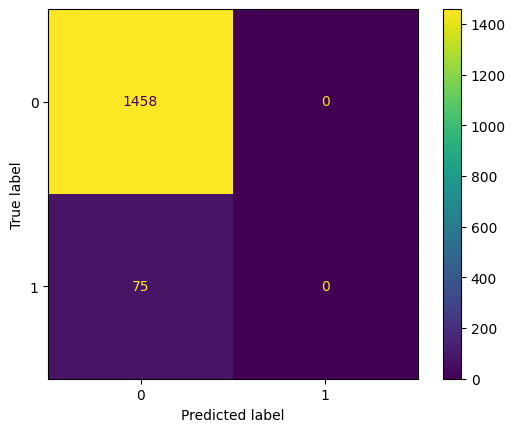

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_best_scaled), display_labels=rf_best_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
## entrenamiento con SMOTE
rf_smote_scaled = RandomForestClassifier()
rf_smote_scaled.fit(X_train_scaled_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf_smote_scaled = rf_smote_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_rf_smote_scaled)

0.8480104370515329

In [ ]:
print(classification_report(y_test, y_pred_rf_smote_scaled))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1458
           1       0.07      0.16      0.09        75

    accuracy                           0.85      1533
   macro avg       0.51      0.52      0.51      1533
weighted avg       0.91      0.85      0.88      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_rf_smote_scaled))

[[1288  170]
 [  63   12]]


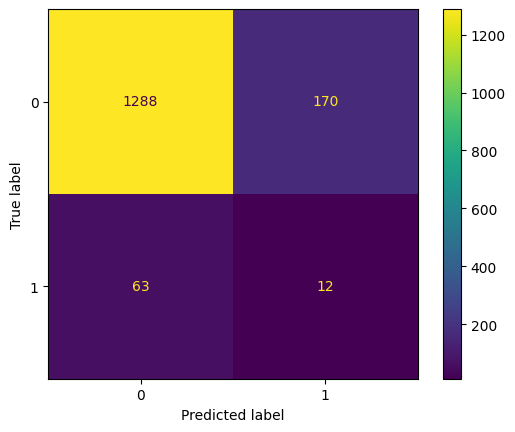

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_smote_scaled), display_labels=rf_smote_scaled.classes_)
disp.plot()
plt.show()

In [ ]:
#grid search
rf_best_smote_scaled = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

In [ ]:
rf_best_smote_scaled.fit(X_train_scaled_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
rf_best_smote_scaled.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
y_pred_rf_best_smote_scaled = rf_best_smote_scaled.predict(X_test_scaled)

In [ ]:
accuracy_score(y_test, y_pred_rf_best_smote_scaled)

0.7514677103718199

In [ ]:
print(classification_report(y_test, y_pred_rf_best_smote_scaled))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1458
           1       0.07      0.31      0.11        75

    accuracy                           0.75      1533
   macro avg       0.51      0.54      0.48      1533
weighted avg       0.91      0.75      0.82      1533



In [ ]:
print(confusion_matrix(y_test, y_pred_rf_best_smote_scaled))

[[1129  329]
 [  52   23]]


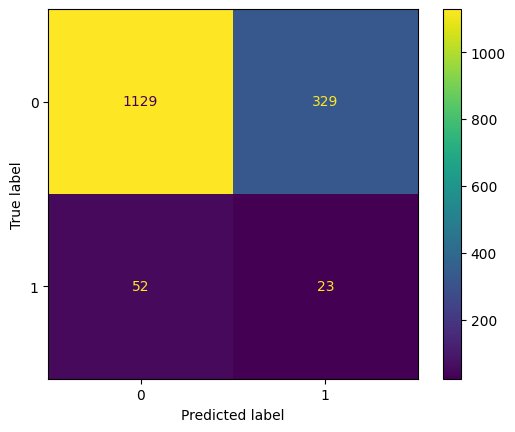

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_best_smote_scaled), display_labels=rf_best_smote_scaled.classes_)
disp.plot()
plt.show()

###Análisis de Resultados y Conclusiones
Se puede observar que ambos modelos mostraron un buen rendimientos (arriba del 90% de accuracy) para los datos sin escalar y escalados, lo único que se pudo notar es que no clasificaron bien en la etiqueta de "Stroke". Al entrenar los modelos con los datos balanceados (SMOTE), se nota un decenso en su rendimiento del accuracy, pero viendo las matrices de confusión fueron capaces de clasificar mejor los datos de prueba de la etiqueta "Stroke"